In [1]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from torchmetrics.classification import MulticlassPrecisionRecallCurve

ยังไม่ได้แก้ให้เหมือนเดิมทั้งหมดดดด พอดีพึ่งนึกได้ว่าควร dupe เก็บไว้ก่อน

In [2]:
df = pd.read_csv("../3 - Cleaning & Transforming Data/1 cleaned_dataset_splited_output.csv")

In [3]:
df.drop(columns=['ADR'],inplace=True)
df

,ADR_FDE,ADR_MPeruption,ADR_MPexanthema,ADR_SJS,ADR_TEN,Cohort ethnicity_Black,Cohort ethnicity_Caucasian,Cohort ethnicity_Diverse,Cohort ethnicity_Mongol,No_ADR,...,p2-53-M,p2-53-N,p2-53-P,p2-53-Q,p2-53-R,p2-53-S,p2-53-T,p2-53-V,p2-53-W,p2-53-Y
0,0,0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13096,0,0,0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
13097,0,0,0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
13098,0,0,0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
13099,0,0,0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
col_to_move = df.pop('No_ADR')
df.insert(0, 'No_ADR', col_to_move)

In [5]:
df_labels = df.iloc[:,0:6]
df_input = df.iloc[:, 6:]

In [6]:
df_labels

,No_ADR,ADR_FDE,ADR_MPeruption,ADR_MPexanthema,ADR_SJS,ADR_TEN
0,0,0,0,0,0.0,1
1,0,0,0,0,0.0,1
2,0,0,0,0,0.0,1
3,0,0,0,0,0.0,1
4,0,0,0,0,0.0,1
...,...,...,...,...,...,...
13096,1,0,0,0,0.0,0
13097,1,0,0,0,0.0,0
13098,1,0,0,0,0.0,0
13099,1,0,0,0,0.0,0


In [7]:
df_input

,Cohort ethnicity_Black,Cohort ethnicity_Caucasian,Cohort ethnicity_Diverse,Cohort ethnicity_Mongol,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,p2-53-M,p2-53-N,p2-53-P,p2-53-Q,p2-53-R,p2-53-S,p2-53-T,p2-53-V,p2-53-W,p2-53-Y
0,0,0,1,0,12.739529,-1.532351,12.739529,0.357593,0.748363,236.274,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,12.739529,-1.532351,12.739529,0.357593,0.748363,236.274,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,12.739529,-1.532351,12.739529,0.357593,0.748363,236.274,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,7.915334,-0.518197,7.915334,0.030546,0.813810,256.096,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,12.739529,-1.532351,12.739529,0.357593,0.748363,236.274,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13096,0,0,0,1,13.134491,-3.247416,13.134491,0.183634,0.782958,252.273,...,0,0,0,0,0,0,0,0,0,1
13097,0,0,0,1,13.134491,-3.247416,13.134491,0.183634,0.782958,252.273,...,0,0,0,0,0,0,0,0,0,1
13098,0,0,0,1,13.134491,-3.247416,13.134491,0.183634,0.782958,252.273,...,0,0,0,0,0,0,0,0,0,1
13099,0,0,0,1,13.134491,-3.247416,13.134491,0.183634,0.782958,252.273,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# #คำนวณร้อยละของข้อมูลของแต่ละ input
# # for x in df_labels.sum():
# #     print(x*100/len(df_input))
# df_labels.value_counts(0)/len(df_labels) #ร้อยละของข้อมูล 0 แทนไม่เกิด 1 แทนเกิด ADR

KeyError: 0

note เก่า ไม่ใช้แล้ว


{'No_ADR': 0,
 'ADR_AIU': 1,
 'ADR_Agranulocytosis': 2,
 'ADR_FDE': 3,
 'ADR_Juandice': 4,
 'ADR_MPeruption': 5,
 'ADR_MPexanthema': 6,
 'ADR_SJSI': 7,
 'ADR_SJSII': 8,
 'ADR_TEN': 9}

In [9]:
#แปลงเป็น numpy array
np_input = df_input.to_numpy()
np_labels = df_labels.to_numpy()

In [10]:
for x in df_input.columns:
    print(x)

#screen หาอะไรแปลก ๆ เผื่อมี

Cohort ethnicity_Black
Cohort ethnicity_Caucasian
Cohort ethnicity_Diverse
Cohort ethnicity_Mongol
MaxEStateIndex
MinEStateIndex
MaxAbsEStateIndex
MinAbsEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EStat

In [11]:
#train test split
train_data, test_data, train_labels, test_labels = train_test_split(np_input, np_labels, test_size=0.2, random_state=42, stratify=np_labels, shuffle = True)

In [12]:
#แปลง numpy เข้า TensorDataSet และ DataLoader
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).float()), batch_size=64)
test_loader = DataLoader(TensorDataset(torch.from_numpy(test_data).float(), torch.from_numpy(test_labels).float()), batch_size=test_labels.shape[0])

In [13]:
#นับจำนวน input features
np_input.shape[1]

2480

In [14]:
def CreateModel(dropout_rate):
    model = nn.Sequential(
        nn.Linear(np_input.shape[1],1024), 
        #nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(1024,512),
        #nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(512,256),
        #nn.Dropout(dropout_rate),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,np_labels.shape[1])
    )

    #optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    #loss_function
    loss_fn = nn.CrossEntropyLoss()

    return model,optimizer,loss_fn

In [15]:
# def TrainTest(): #อันนี้ยังไม่ได้ใช้!
#     trainacc = []
#     testacc = []
#     trainloss = []

#     epochs = 100

#     for epoch_i in range(epochs):

#         model.train() #just to make sure that it is on training after switced to model.eval(), also, we are using regularization/normalization so it it probably required as precaution
#         for batch in train_loader:
#             train_data, train_label = batch
#             train_data = train_data.float().to(device)
#             train_label = train_label.float().to(device)

#             optimizer.zero_grad()
#             outputs = model(train_data)
#             loss = loss_fn(outputs, train_label)
#             loss.backward()
#             optimizer.step()
            
#         trainloss.append(loss.item())

#         model.eval() #just to make sure that the model won't compute the gradient
#         #train accuracy
#         with torch.no_grad():
#             outputs = model(train_data)
#             _, predicted = torch.max(outputs, 1)
#             train_label = torch.max(train_label, 1)
#             correct = (predicted == train_label[1]).sum().item()
#             trainacc.append(correct/len(train_label.item()))

#         #test accuracy
#         for batch in test_loader: 
#             test_data, test_label = batch
#             train_data = train_data.float().to(device)
#             train_label = train_label.float().to(device)
#             with torch.no_grad(): #just to make sure that the gradient won't be computed!
#                 outputs = model(test_data)
#                 _, predicted = torch.max(outputs, 1)
#                 correct = (predicted == test_label).sum().item()
#                 testacc.append(correct/test_label.shape[0])

#     return trainacc,testacc,trainloss

In [17]:
writer = SummaryWriter()

model,optimizer,loss_fn = CreateModel(dropout_rate=0.2)

#trainAcc,testAcc,trainLoss = TrainTest()


allepoch_train_loss = []
allepoch_test_acc = []
allepoch_train_acc = []

epochs = 1000
count = 0

for epoch_i in range(epochs):
    #print(f"Epochs: {epoch_i+1}")
    #print("----")
    #batch_no = 0
    running_loss = [] #clear running loss ทุกครั้ง

    for batch in train_loader:

        model.train()

        

        
        #batch_no += train_loader.batch_size

        train_data, train_label = batch
        train_data = train_data.float()
        train_label = train_label.float()

        optimizer.zero_grad()
        outputs = model(train_data)
        loss = loss_fn(outputs, train_label)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item()) 
        #if batch_no % 100 == 0:
            #print(f"Loss: {loss.item():>e} Batch: {batch_no:>5d}/{train_loader.batch_size*len(train_loader):>5d}")



    #train accuracy
    with torch.no_grad():
        outputs = model(train_data)
        _, predicted = torch.max(outputs, 1)
        train_label = torch.max(train_label, 1)
        correct = (predicted == train_label[1]).sum().item()

        train_accuracy = correct/len(train_label[1])
        allepoch_train_acc.append(train_accuracy)


    model.eval()
    #test accuracy
    testacc = []
    for batch in test_loader:
        test_data, test_label = batch
        with torch.no_grad():
            outputs = model(test_data)
            test_label = torch.max(test_label, 1)
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == test_label[1]).sum().item()
            
            test_accuracy = correct/len(test_label[1])
            allepoch_test_acc.append(test_accuracy)

    allepoch_train_loss.append(np.mean(running_loss))
    writer.add_scalar("Loss", np.mean(running_loss), epoch_i+1)
    writer.add_scalar("Train Accuracy", train_accuracy, epoch_i+1)
    writer.add_scalar("Test Accuracy", test_accuracy, epoch_i+1)

    print(f"{epoch_i}, Loss: {np.mean(running_loss):.3f}, Train_Accuracy: {train_accuracy*100}, Test_Accuracy: {test_accuracy*100:.2f}")

    if epoch_i > 3:
        if allepoch_train_loss[epoch_i-2] - allepoch_train_loss[epoch_i-1] <= 0:
            count += 1
        else:
            count = 0

        if count == 3:
            print(f"Early Stopped, loss not increasing for {count} times")
            break

0, Loss: 287.491, Train_Accuracy: 10.416666666666668, Test_Accuracy: 14.99
1, Loss: 2.940, Train_Accuracy: 70.83333333333334, Test_Accuracy: 64.56
2, Loss: 1.430, Train_Accuracy: 68.75, Test_Accuracy: 64.02


In [164]:
test_tensor = torch.zeros(len(predicted),10)
test_tensor
count = 0
for x in predicted:
    test_tensor[count][x.item()] = 1
    count += 1
    print(test_tensor)

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ...

In [396]:
test_label

torch.return_types.max(
values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
indices=tensor([9, 9, 4,  ..., 9, 8, 9]))

# save model

In [457]:
# Model Saver
numberofmodel = 8

In [458]:
#calculate accuracy, precision, recall for each index by matching the value of test_tensor (prediction) and test_label (ground truth)
predicted_dict = {}
for x in range(predicted.shape[0]):
    if torch.argmax(test_tensor[0]).item() in predicted_dict.keys():
        predicted_dict[torch.argmax(test_tensor[0]).item()] += 1
    else:
        predicted_dict[torch.argmax(test_tensor[0]).item()] = 1

label_dict = {}
for x in test_loader.dataset:
    if torch.argmax(x[1]).item() in label_dict.keys():
        label_dict[torch.argmax(x[1]).item()] += 1
    else:
        label_dict[torch.argmax(x[1]).item()] = 1
label_dict = dict(sorted(label_dict.items(), key=lambda item: item[0]))

In [459]:
true_labels = {'No_ADR': 0,
 'ADR_AIU': 1,
 'ADR_Agranulocytosis': 2,
 'ADR_FDE': 3,
 'ADR_Juandice': 4,
 'ADR_MPeruption': 5,
 'ADR_MPexanthema': 6,
 'ADR_SJSI': 7,
 'ADR_SJSII': 8,
 'ADR_TEN': 9}

 #switch true_labels keys an values
true_labels = {v: k for k, v in true_labels.items()}
true_labels

{0: 'No_ADR',
 1: 'ADR_AIU',
 2: 'ADR_Agranulocytosis',
 3: 'ADR_FDE',
 4: 'ADR_Juandice',
 5: 'ADR_MPeruption',
 6: 'ADR_MPexanthema',
 7: 'ADR_SJSI',
 8: 'ADR_SJSII',
 9: 'ADR_TEN'}

In [460]:
list(df_labels.columns)

['ADR_AIU',
 'ADR_Agranulocytosis',
 'ADR_FDE',
 'ADR_Juandice',
 'ADR_MPeruption',
 'ADR_MPexanthema',
 'ADR_SJSI',
 'ADR_SJSII',
 'ADR_TEN',
 'No_ADR']

In [461]:
predicted_dict

{9: 2621}

In [462]:
label_dict

{2: 1, 4: 103, 5: 133, 6: 350, 7: 64, 8: 277, 9: 1693}

In [463]:
#remove the keys in true_labels that are not the keys in label_dict
true_labels = {k: v for k, v in true_labels.items() if k in label_dict.keys()}
true_labels

{2: 'ADR_Agranulocytosis',
 4: 'ADR_Juandice',
 5: 'ADR_MPeruption',
 6: 'ADR_MPexanthema',
 7: 'ADR_SJSI',
 8: 'ADR_SJSII',
 9: 'ADR_TEN'}

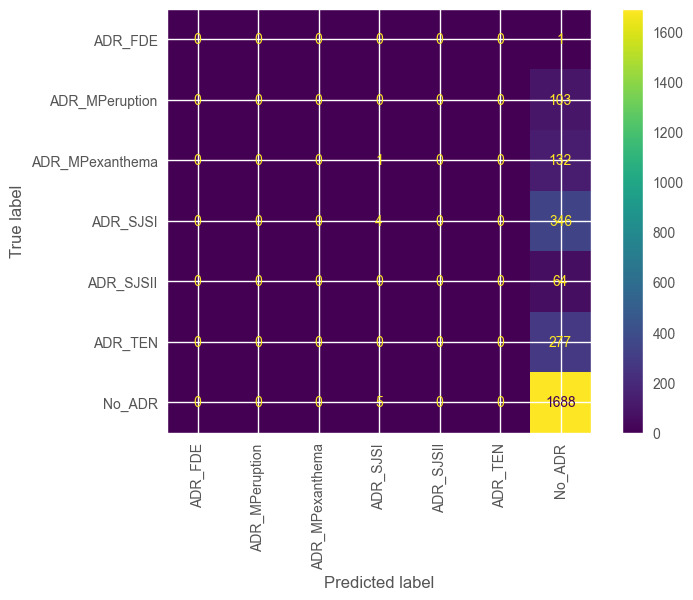

In [464]:
classes = list(df_labels.columns)

#remove the value in list(df_labels.columns) that got the sum of 0 in df_labels.sum(0)
for x in list(df_labels.columns):
    if df_labels[x].sum(0) == 0:
        classes.remove(x)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

#classes = true_labels.keys()
#classes = list(df_labels.columns)
cf_matrix = confusion_matrix(test_label[1], predicted)
#df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     #columns = [i for i in classes])
#plt.figure(figsize = (12,7))
#sn.heatmap(df_cm, annot=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=classes)
disp.plot(xticks_rotation=90)
disp.figure_.savefig(f'../4 - Training & Testing/models/model_{numberofmodel}_cf.png')

In [488]:
from sklearn.metrics import classification_report
cr = classification_report(test_label[1], predicted, target_names=classes)
print(cr)

                 precision    recall  f1-score   support

        ADR_FDE       0.00      0.00      0.00         1
 ADR_MPeruption       0.00      0.00      0.00       103
ADR_MPexanthema       0.00      0.00      0.00       133
       ADR_SJSI       0.40      0.01      0.02       350
      ADR_SJSII       0.00      0.00      0.00        64
        ADR_TEN       0.00      0.00      0.00       277
         No_ADR       0.65      1.00      0.78      1693

       accuracy                           0.65      2621
      macro avg       0.15      0.14      0.12      2621
   weighted avg       0.47      0.65      0.51      2621



c:\Users\harit\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harit\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\harit\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [466]:
f = open(f"../4 - Training & Testing/models/model_{numberofmodel}.txt","w")
f.writelines(str(model.parameters))
f.writelines("\n------------------\n")
f.writelines(str(optimizer))
f.writelines("\n------------------\n")
f.write(str(loss_fn))
f.writelines("\n------------------\n")
f.write("all_train_loss"+ str(allepoch_train_loss))
f.writelines("\n------------------\n")
f.write(""+str(allepoch_test_acc))
f.writelines("\n------------------\n")
f.write("all_train_loss"+str(allepoch_train_acc))
f.writelines("\n------------------\n")
f.write(cr)
f.close()

In [467]:
torch.save(model.state_dict(),f"../4 - Training & Testing/models/model_{numberofmodel}.pt")

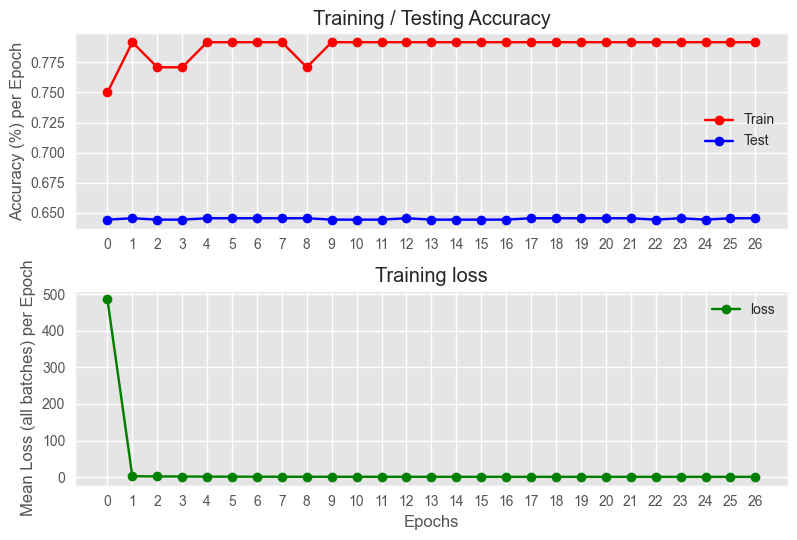

In [468]:
fig, ax = plt.subplots(2,1)
plt.style.use('ggplot')

ax[0].set_title("Training / Testing Accuracy")
ax[0].plot(allepoch_train_acc, 'red',label='Train',marker='o')
ax[0].plot(allepoch_test_acc,'blue',label='Test',marker='o')
ax[0].xaxis.set(ticks=range(0,len(allepoch_train_acc),1))
ax[0].set_ylabel("Accuracy (%) per Epoch")
ax[0].legend()
#ax[0].text(4,1,f"Model: {numberofmodel}")


ax[1].set_title("Training loss")
ax[1].set_xlabel("Epochs")
ax[1].plot(allepoch_train_loss,label = 'loss',marker='o',color='green')
ax[1].xaxis.set(ticks=range(0,len(allepoch_train_acc),1))
ax[1].set_ylabel("Mean Loss (all batches) per Epoch")
ax[1].legend()
#plt.show()

plt.tight_layout()#h_pad = 3, w_pad=3)
plt.savefig(f"../4 - Training & Testing/models/model_{numberofmodel}.png")

In [469]:
# fig, ax = plt.subplots()
# ax.bar(list(correctresult.keys()),list(correctresult.values()),label="Correct",bottom=list(wrongresult.values()))
# ax.bar(list(wrongresult.keys()),list(wrongresult.values()),label="Wrong")
# ax.legend()
# #plt.text(1,1,"test")
# # for i in range(len(list(correctresult.keys()))):
# #     plt.text(i,list(correctresult.values())[i],list(correctresult.values())[i])
# # for i in range(len(list(wrongresult.keys()))):
# #     plt.text(i,list(wrongresult.values())[i],list(wrongresult.values())[i])
# plt.show()